In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import os, sys
sys.path.append('..')
from glob import glob
from configs import *
from tqdm import tqdm
from utils import *
import numpy as np
import matplotlib.pyplot as plt
from dataset import *
from time import time
tqdm.monitor_interval = 0
import torch
import json
import torch.nn as nn
import numpy as np
torch.manual_seed(0)
torch.cuda.manual_seed(0)
np.random.seed(0)

In [3]:
neighbors = range(0, 2)
models = [
    'linear',
    'rnn',
    'mprnn',
]
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [4]:
n3s = glob('../data/graphs/*_n3*')
print(len(n3s))

94


In [38]:
n3s = glob('../data/graphs/*_n3*')
print(len(n3s))

valid = []
for fi, fname in enumerate(n3s):
    try:
        SROUTE, ADJ = read_graph(fname, verbose=False, named_adj=True)
        viewset = SpotHistory(SROUTE, 'test', 18, lag=None, res=10, shuffle=False, verbose=False)
#         valid.append((fname, SROUTE, ADJ, viewset))
    except:
        pass
#         skipped += 1
    sys.stdout.write('%d/%d  \r' % (fi+1, len(n3s)))
sys.stdout.flush()
        
print('Valid', len(valid))

94
Valid 0


In [18]:
testable = []
for viewset in valid:
    avglen = np.mean([len(series) for series in viewset])
    if avglen < 100:
        continue
        
    wfile = glob('%s/mprnn/%s_n3.pth' % (CKPT_STORAGE, viewset.segments[0]))
    if len(wfile):
        testable.append((wfile[0], viewset))
print(len(testable))

59


In [31]:
tryone = testable[2]

In [28]:
graph_file = '../data/graphs/%s.json' % fileName(tryone[0])
graph_file

'../data/graphs/303259-302434_n3.json'

In [34]:
SROUTE, ADJ = read_graph(graph_file, verbose=False, named_adj=True)

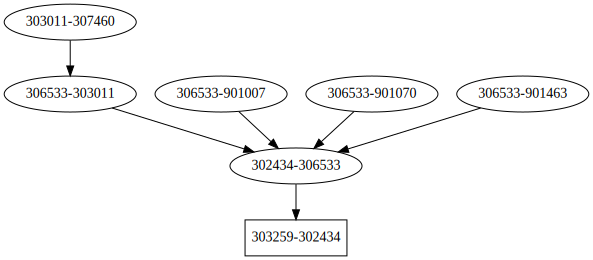

In [35]:
from utils import *
# show_graph(SROUTE, ADJ)
show_graph(SROUTE, ADJ)

In [32]:
model = torch.load(tryone[0])

In [61]:
from forecast import *

303259-302434
MPRNN


../models/MPRNN.py:87: UserWarning: RNN module weights are not part of single contiguous chunk of memory. This means they need to be compacted at every call, possibly greatly increasing memory usage. To compact weights again call flatten_parameters().
  hout, hdn = rnn.rnn(hin, hdn)


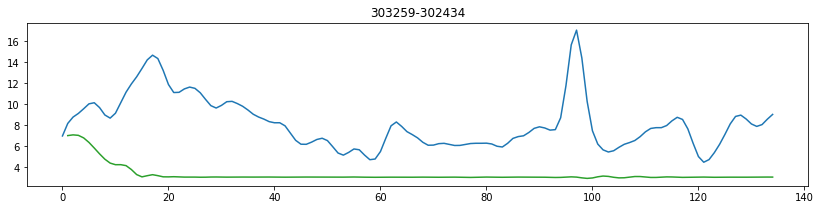

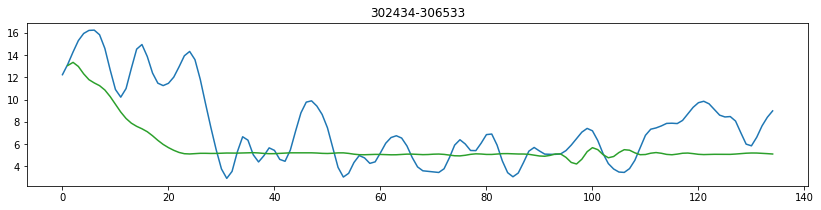

RNN


../models/temporal/RNN.py:36: UserWarning: RNN module weights are not part of single contiguous chunk of memory. This means they need to be compacted at every call, possibly greatly increasing memory usage. To compact weights again call flatten_parameters().
  output, hidden = self.rnn(input, hidden)


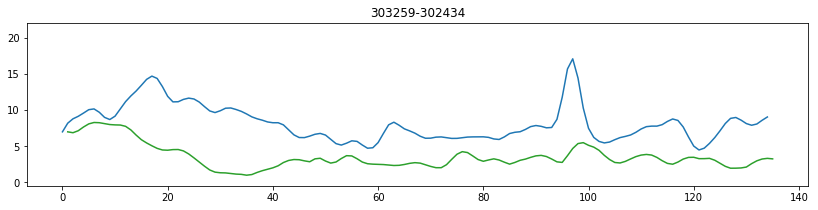

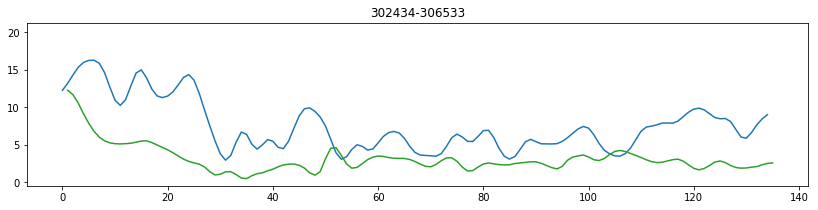

303259-302434
MPRNN


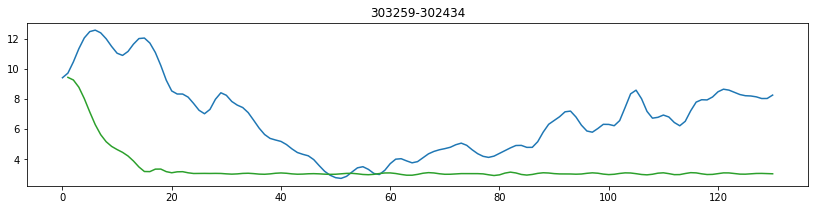

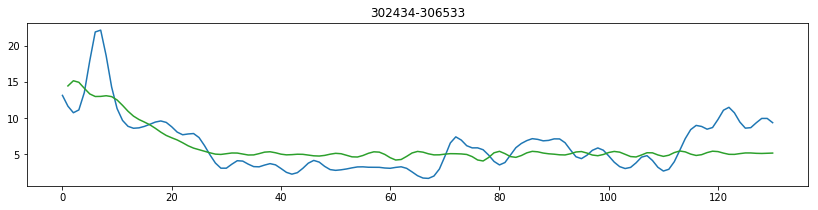

RNN


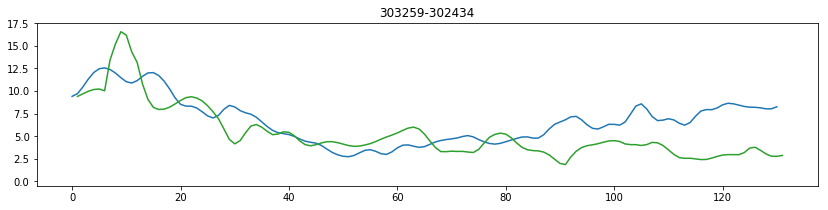

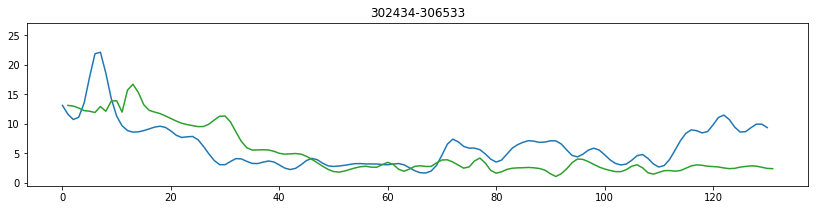

303259-302434
MPRNN


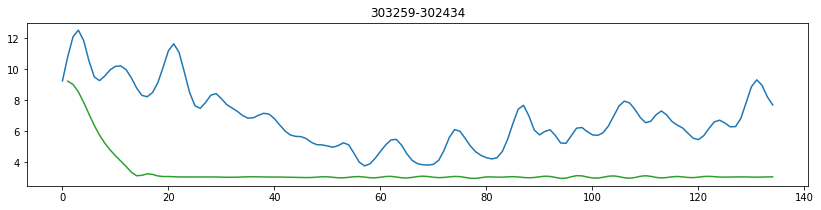

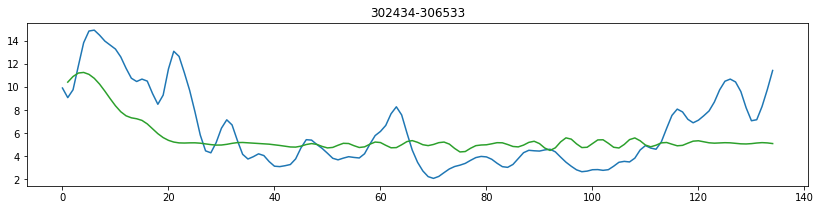

RNN


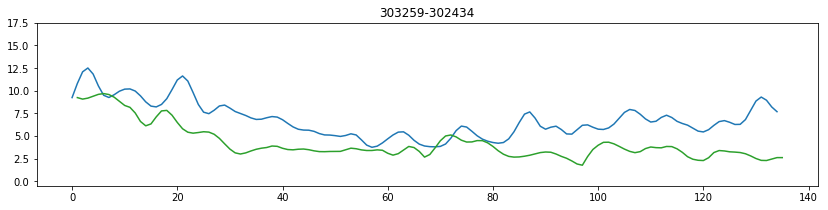

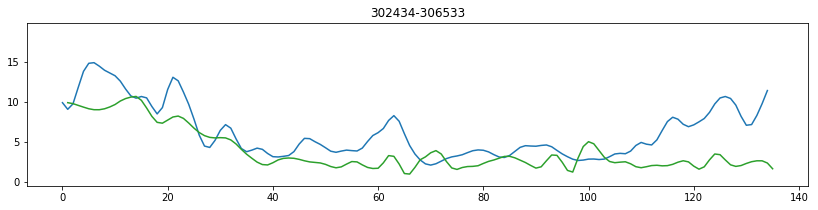

303259-302434
MPRNN


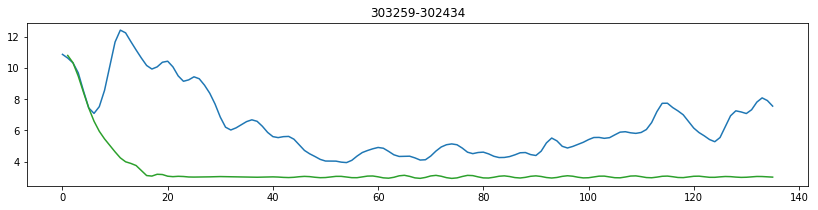

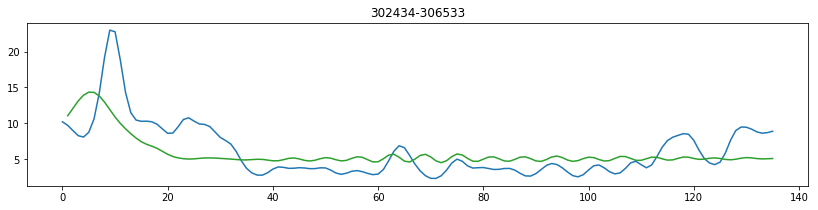

RNN


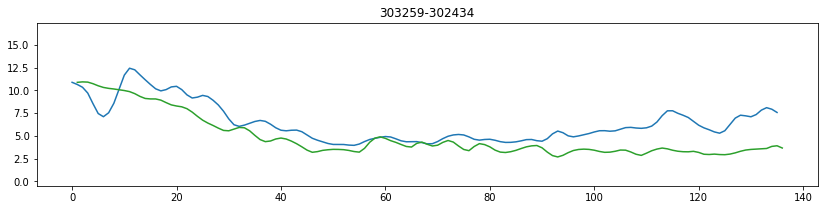

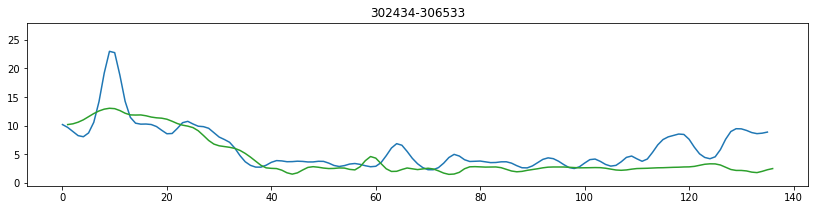

303259-302434
MPRNN


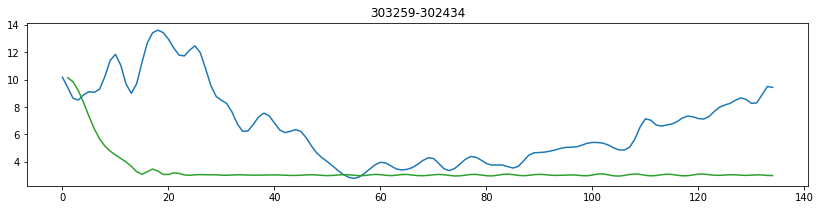

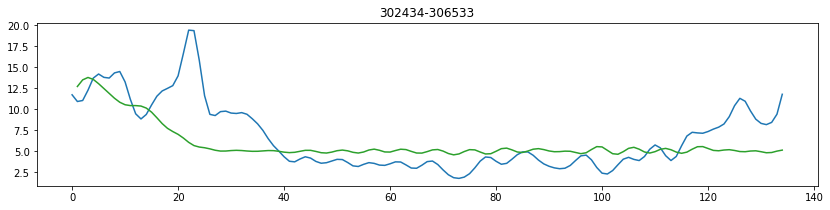

RNN


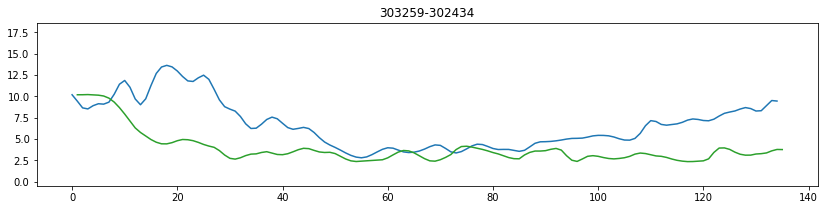

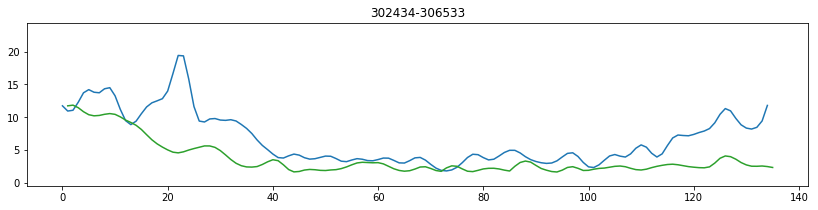

303259-302434
MPRNN


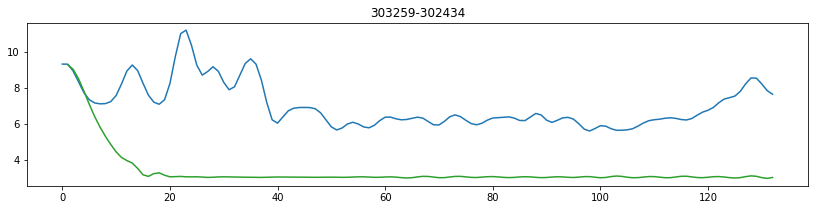

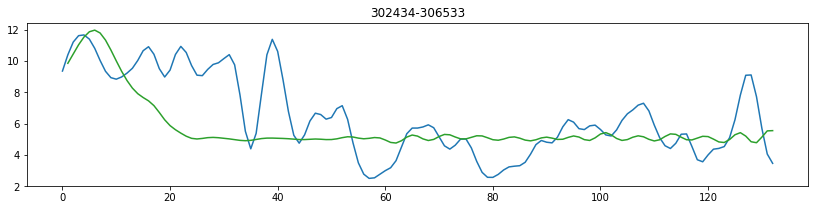

RNN


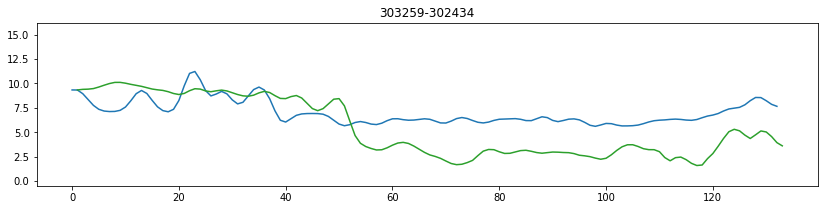

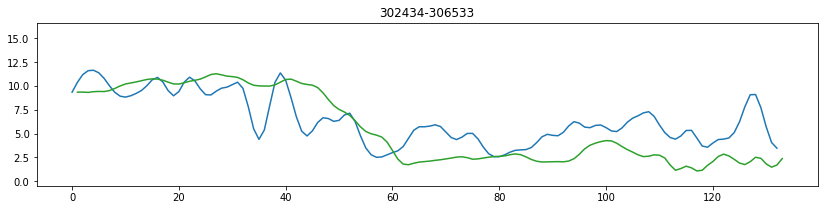

303259-302434
MPRNN


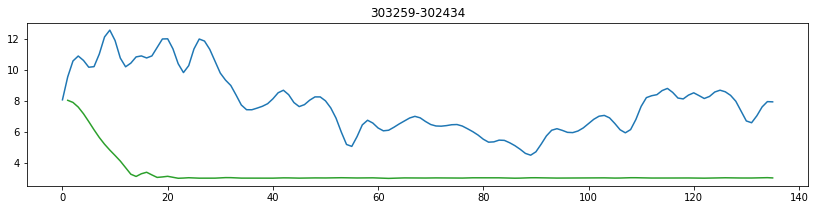

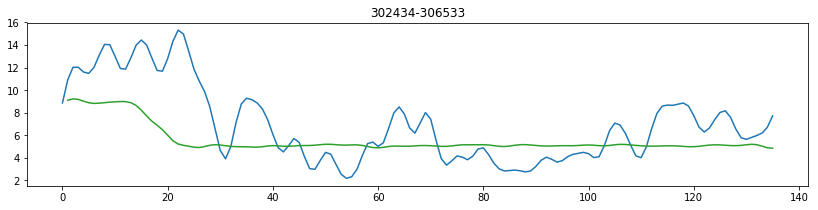

RNN


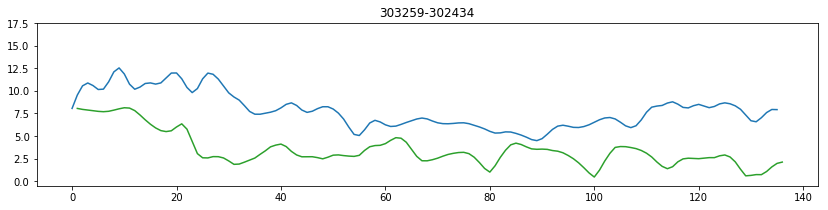

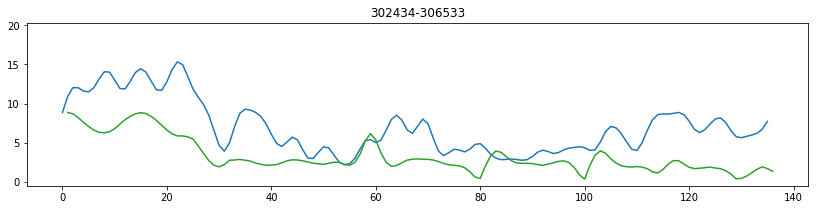

303259-302434
MPRNN


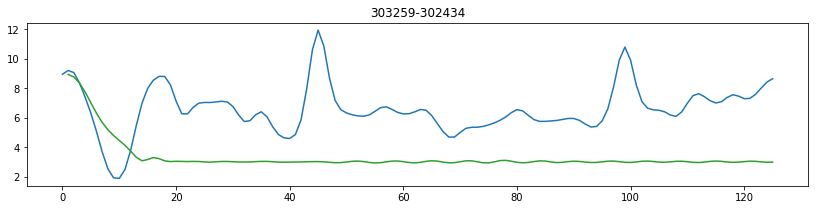

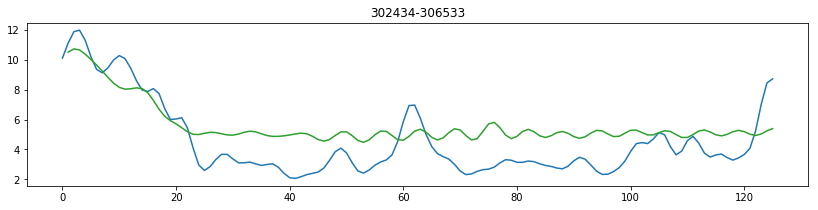

RNN


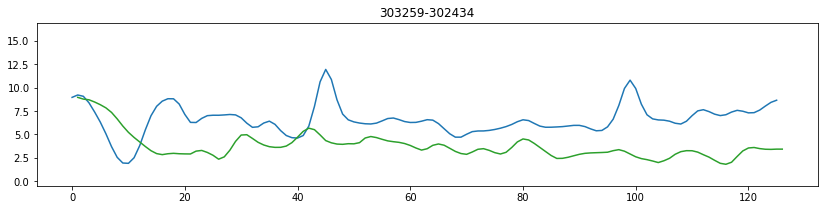

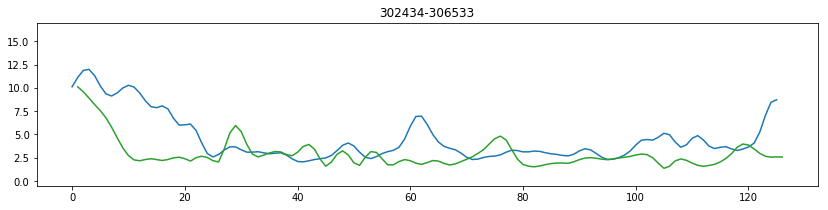

303259-302434
MPRNN


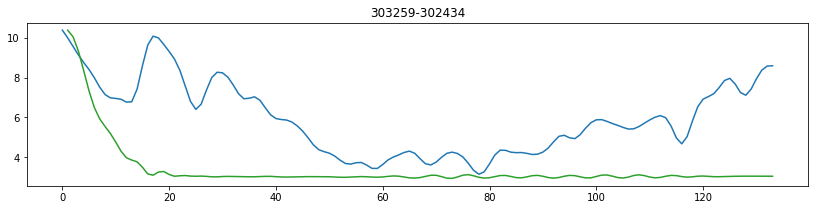

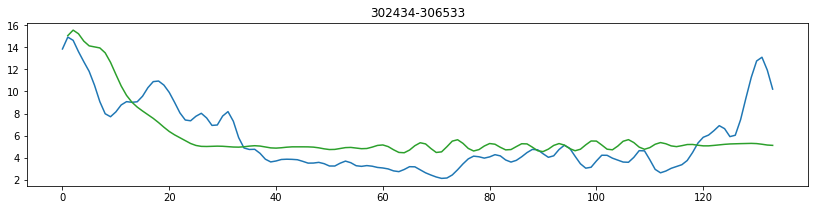

RNN


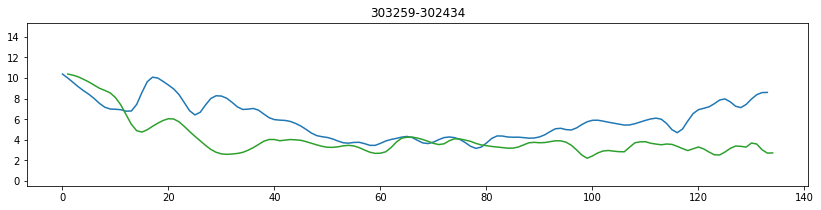

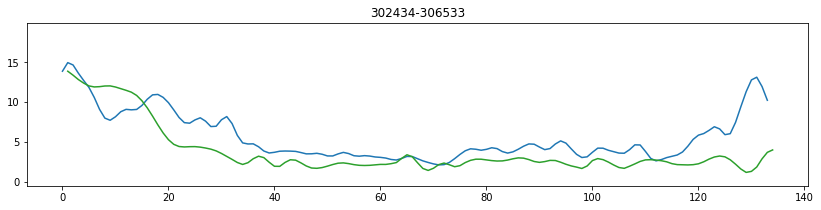

303259-302434
MPRNN


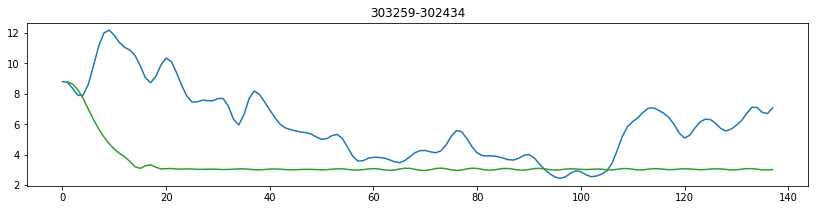

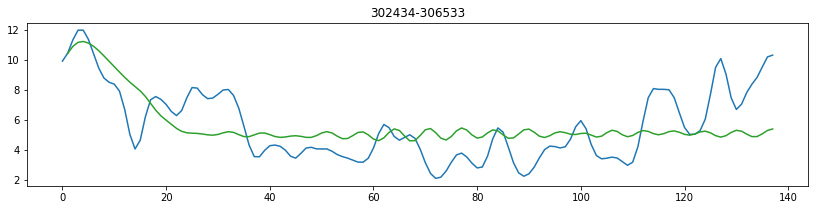

RNN


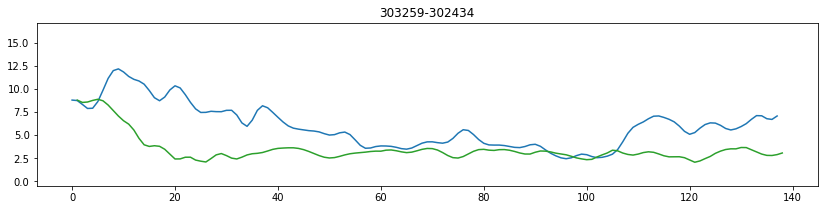

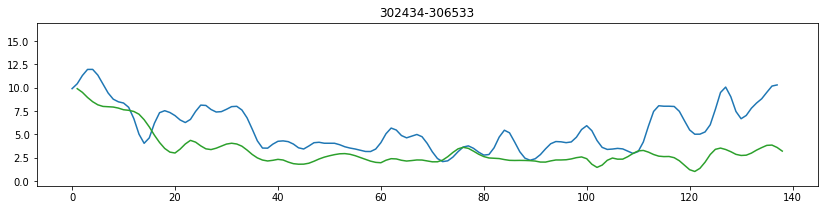

303259-302434
MPRNN


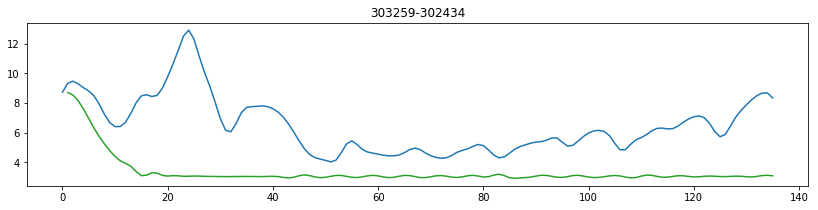

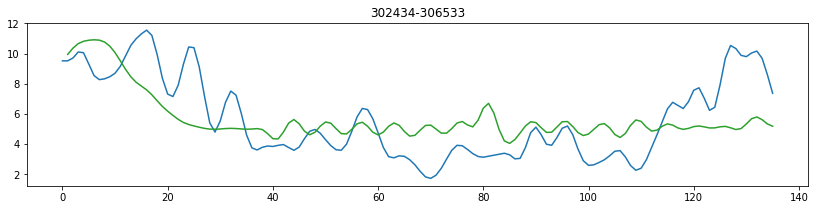

RNN


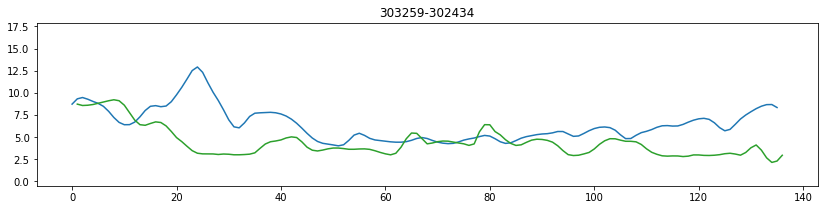

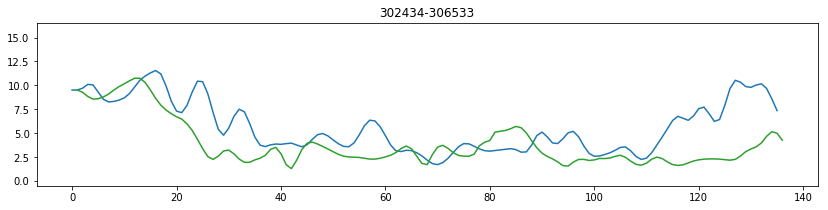

303259-302434
MPRNN


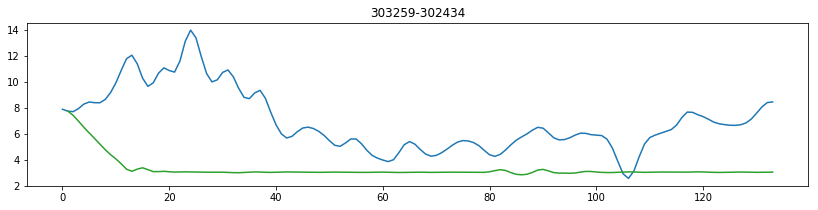

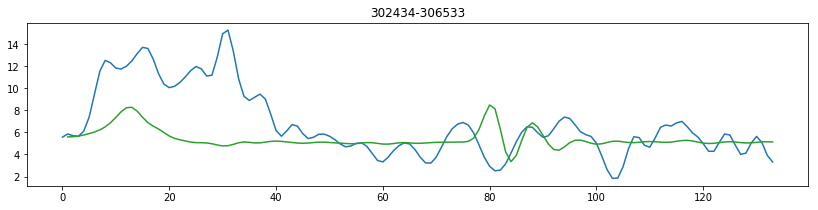

RNN


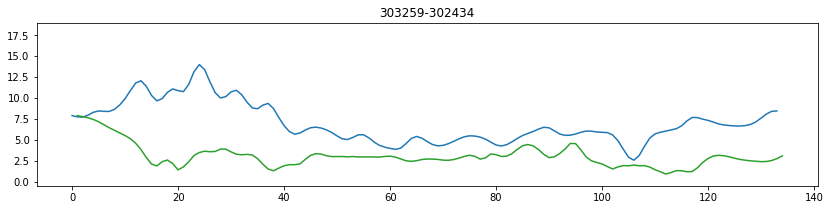

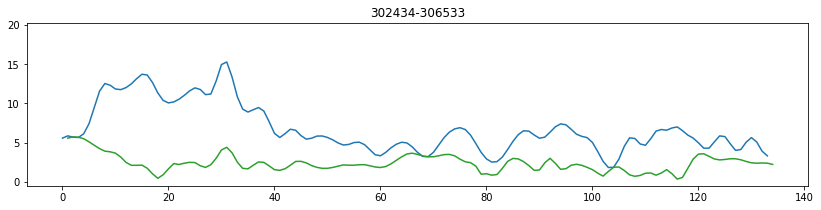

303259-302434
MPRNN


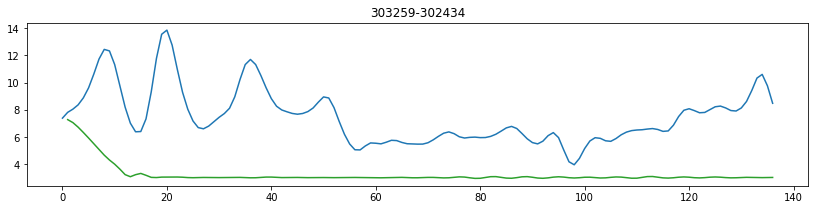

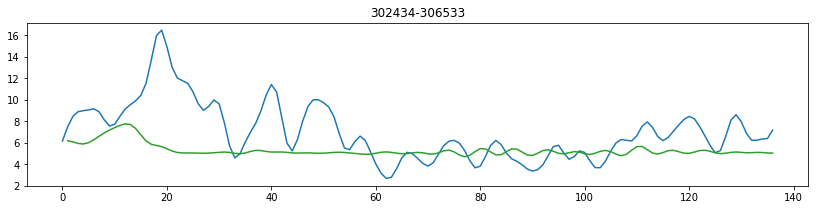

RNN


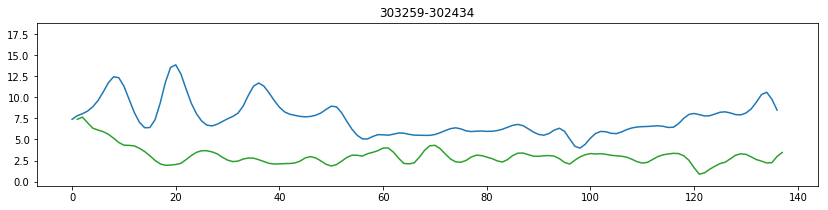

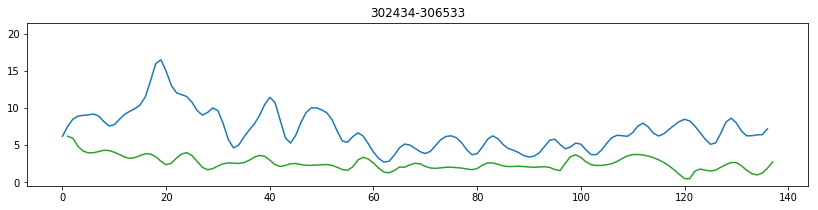

303259-302434
MPRNN


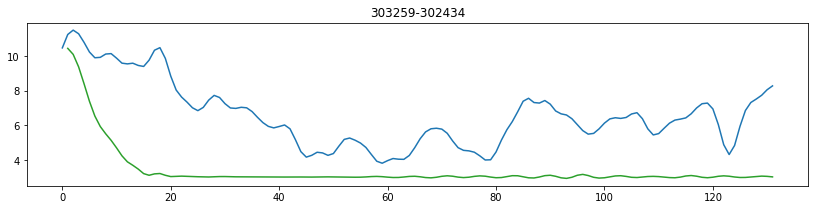

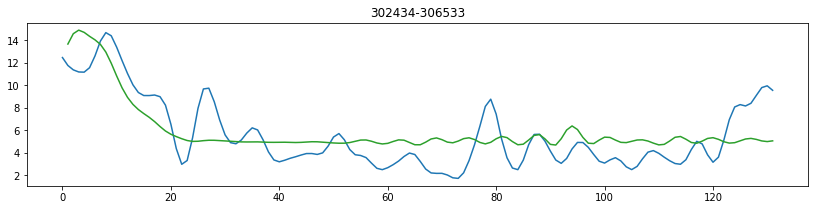

RNN


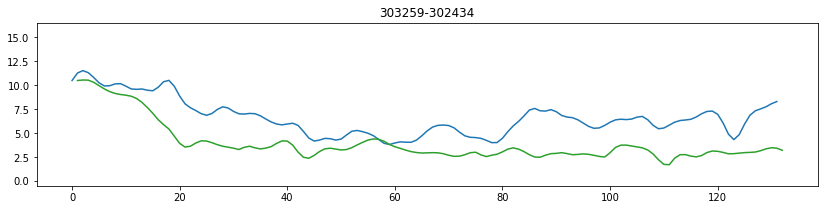

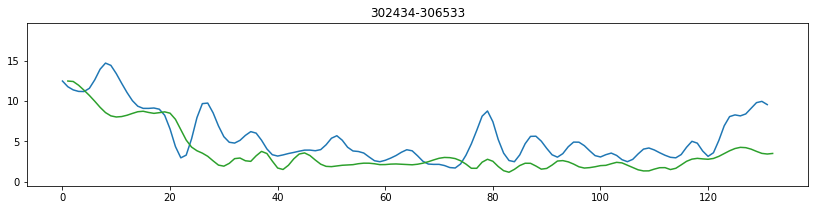

303259-302434
MPRNN


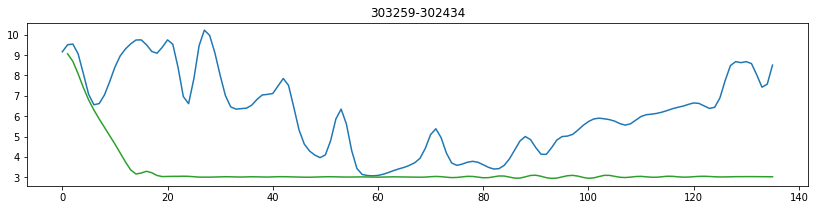

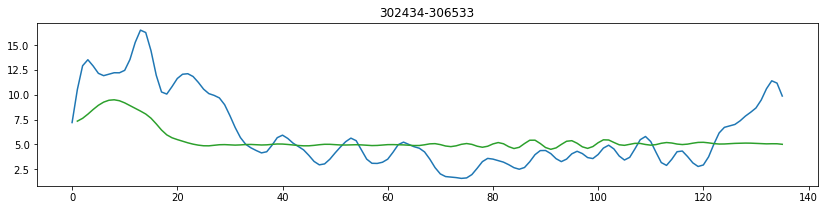

RNN


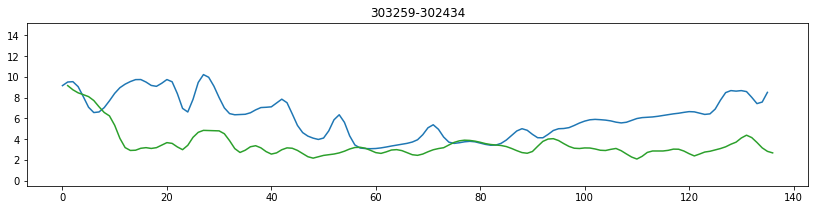

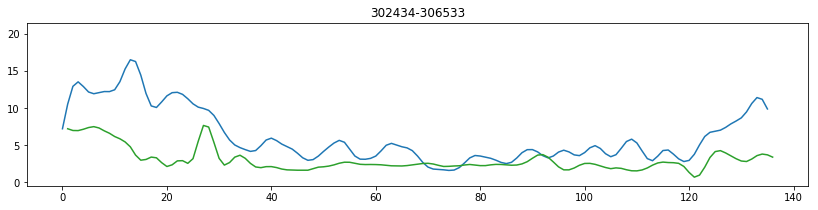

303259-302434
MPRNN


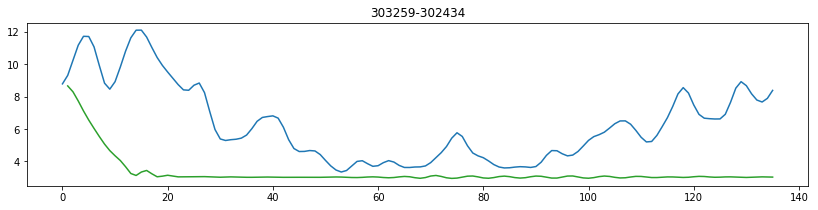

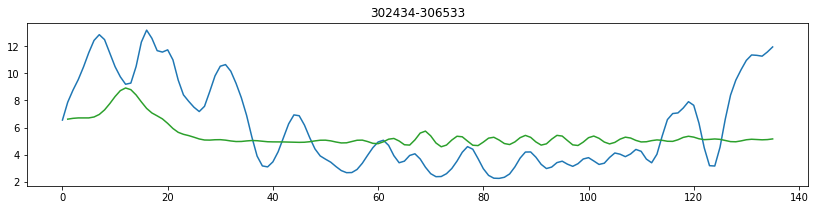

RNN


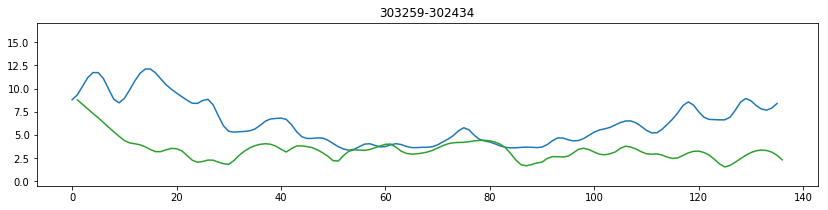

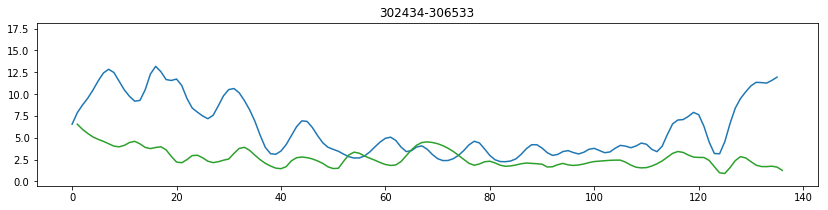

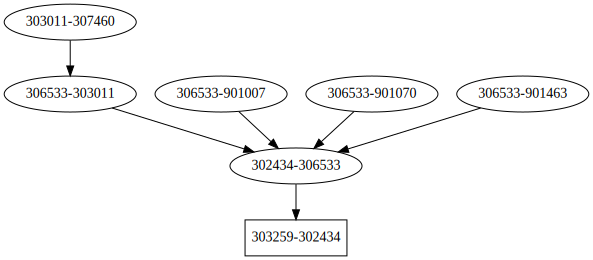

In [71]:
viewset = tryone[1]
vs, adjs = read_graph(graph_file, verbose=False, named_adj=True)
gobj = show_graph(vs, adjs)

for series in viewset:
    print(viewset.segments[0])
    
    
    print('MPRNN')
    targerr, nerrs = forecast_mprnn(series, model, graph_file, 
                                    plot_targets=[0, 1],
                                    runlen=48, device=device, plot=True)
#     for ni, elist in nerrs.items():
#         print(vs[ni], np.mean(elist))
        
    print('RNN')
    rnn = torch.load(tryone[0].replace('mprnn', 'rnn'))
    forecast_rnn(series, rnn, graph_file, 
                                    plot_targets=[0, 1],
                                    device=device, plot=True)
#     break
gobj